## Training Materials Outline: Visualization of ALOS-2/PALSAR-2 Data using Python

**Module 1: Introduction to ALOS-2/PALSAR-2 Data**

* **1.1 Overview of ALOS-2 Satellite:**
    * Briefly introduce the ALOS-2 satellite and its mission (EO Portal reference).
    * Describe the PALSAR-2 sensor and its capabilities (JAXA Handbook, EO Portal).
    * Explain the advantages of L-band SAR, especially for vegetation and forest monitoring (ResearchGate reference).

* **1.2 Applications of ALOS-2 Data:**
    * Highlight key applications, focusing on forest monitoring, change detection, and plantation mapping (EO Portal, ResearchGate, Digital Earth Africa).
    * Show examples of ALOS-2 data used for these applications (include visuals).

* **1.3 Data Access and Formats:**
    * Explain where to access ALOS-2 data (JAXA, ASF DAAC).
    * Describe common data formats (e.g., GeoTIFF) and their structure (Blog post on GeoTIFF).

**Module 2: Python Fundamentals for EO Data Processing**

* **2.1 Introduction to Python:**
    * Cover basic Python concepts: variables, data types, operators, control flow (Python Principles tutorial).
    * Introduce relevant libraries: `rasterio`, `matplotlib`, `numpy`, `geopandas` (install instructions).

In [ ]:
!pip install rasterio matplotlib numpy geopandas

* **2.2 Working with Files and Data:**
    * Demonstrate reading and writing files in Python (Python documentation).
    * Explain basic data manipulation with `numpy` arrays (emphasize array slicing, indexing).

In [3]:
import numpy as np

data = np.array([1, 2, 3, 4, 5])

# Writing to a file
with open('data.txt', 'w') as f:
    for item in data:
        f.write(str(item) + '\n')

# Reading from a file
loaded_data = []
with open('data.txt', 'r') as f:
    for line in f:
        loaded_data.append(int(line.strip()))

loaded_data = np.array(loaded_data)

# Array slicing and indexing
slice = loaded_data[1:4]  # Elements at index 1, 2, and 3
element = loaded_data[0] # Element at index 0
print(f"Slice: {slice}")
print(f"Element: {element}")

Slice: [2 3 4]
Element: 1


* **2.3 Defining and Using Functions:**
    * Show how to create and use functions for code organization and reusability (Python Principles tutorial).

In [4]:
def add(x, y):
    return x + y

result = add(5, 3)
print(f"Result: {result}")

Result: 8


**Module 3: Reading and Visualizing ALOS-2 Data**

* **3.1 Loading ALOS-2 Data with `rasterio`:**
    * Provide hands-on examples of loading GeoTIFF data (Towards Data Science reference, provided code examples).
    * Explain how to access metadata (CRS, transform, bands) and its importance.

In [8]:
import rasterio

# Replace with your actual file path
filepath = '/home/jovyan/shared/PCN/ALOS-2/GEN_AI/1-demo_data/Alos_2_2007_HV.tif'

with rasterio.open(filepath) as src:
    # Read the first band
    band1 = src.read(1)
    
    # Access metadata
    metadata = src.meta
    print(metadata)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 9000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00022222222222222223, 0.0, 100.0,
       0.0, -0.00022222222222222223, 2.0)}


* **3.2 Basic Visualization with `matplotlib`:**
    * Demonstrate displaying single-band SAR images using `imshow` (provided code examples).
    * Explain colormaps and their use in SAR visualization.
    * Show how to create titles, labels, colorbars, and adjust figure size.

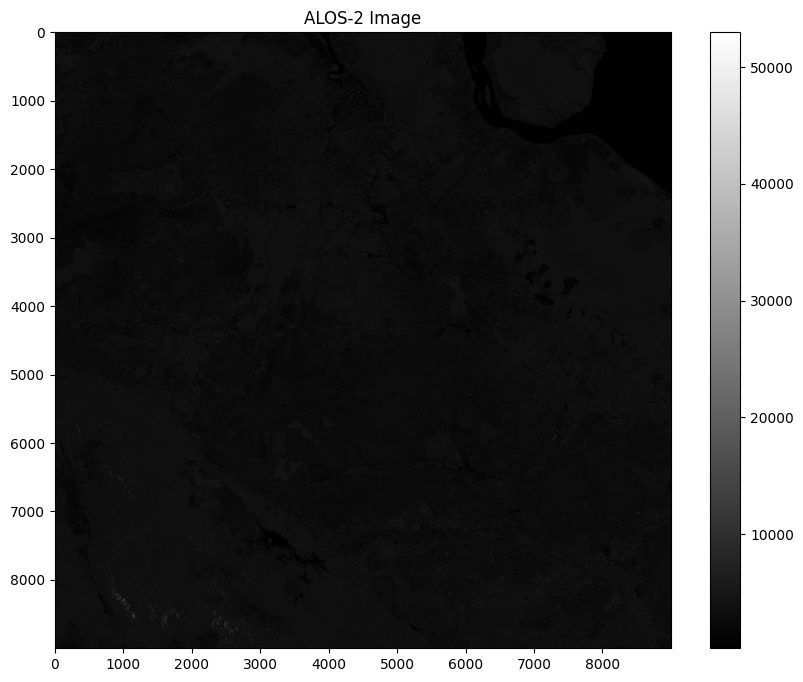

In [37]:
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif') as src:
    image_data = src.read(1) # Read the first band
    metadata = src.meta
    crs = src.crs
    transform = src.transform

plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap='gray')
plt.title('ALOS-2 Image')
plt.colorbar()
plt.show()


* **3.3 Generating RGB Composites:**
    * Explain the concept of RGB composites for multi-temporal visualization (Digital Earth Africa).
    * Provide hands-on examples of creating RGB composites from multiple ALOS-2 images (provided code examples).
    * Demonstrate contrast stretching for enhanced visualization (provided code examples).

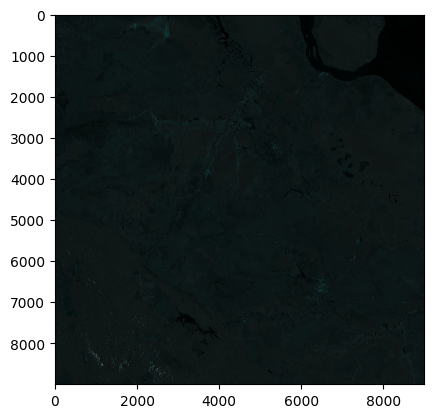

In [14]:
# Creating an RGB composite
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Load images (replace with your actual file paths)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HV.tif') as src1:
    band1 = src1.read(1)
with rasterio.open('/home/jovyan/shared/PCN/ALOS-2/ALOS-2 data/Alos_2_2007_HH.tif') as src2:
    band2 = src2.read(1)

# Normalize bands
band1_norm = (band1 - band1.min()) / (band1.max() - band1.min())
band2_norm = (band2 - band2.min()) / (band2.max() - band2.min())

# Create RGB composite
rgb = np.dstack([band1_norm, band2_norm, band2_norm])

# Display
plt.imshow(rgb)
plt.show()

The overals l darknesmakes interpretation difficult. Adjust the contrast.

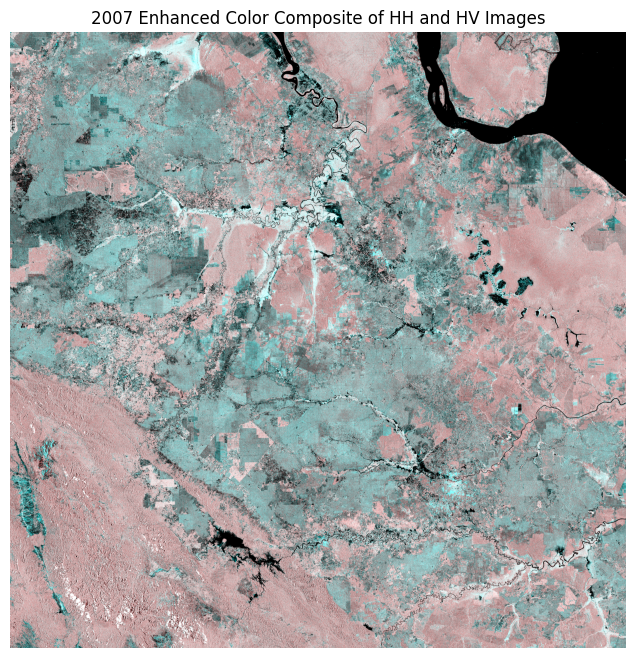

In [20]:
# Create RGB composite for 2007
rgb_composite_2007 = np.dstack([band1_norm, band2_norm, band2_norm])

# Enhance 2007 composite
rgb_composite_enhanced_2007 = enhance_composite(rgb_composite_2007)

# Plot the enhanced composite for 2007
plt.figure(figsize=(8, 8))
plt.imshow(rgb_composite_enhanced_2007)
plt.title("2007 Enhanced Color Composite of HH and HV Images")
plt.axis("off")
plt.show()


* **3.4 Histogram Analysis:**
    * Explain how histograms represent pixel value distribution.
    * Demonstrate computing and plotting histograms with `matplotlib` (provided code examples).
    * Show how to add mean, standard deviation annotations to histograms.

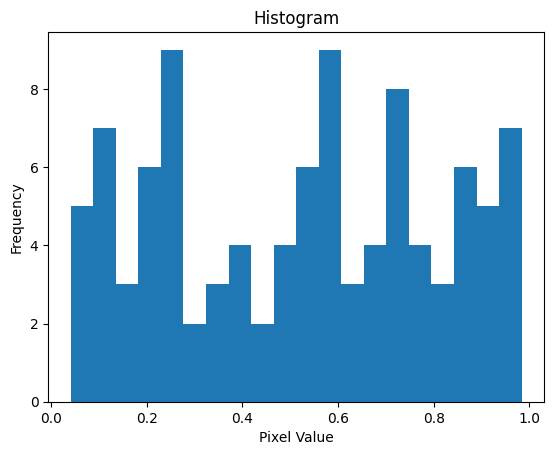

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
data = np.random.rand(10, 10)

plt.hist(data.flatten(), bins=20)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()